Nos reponde el codigo: 200
USGS Magnitude 2.5+ Earthquakes, Past Day
34 events recorded
7 km SSE of Bluff City, Kansas
24 km SW of Coyanosa, Texas
1 km SSE of Standard, Illinois
98 km NW of Hihifo, Tonga
Cook Strait, New Zealand
North Island of New Zealand
89 km WNW of Bengkulu, Indonesia
15 km SW of Petersville, Alaska
San Juan, Argentina
7 km WSW of Langston, Oklahoma
Banda Sea
12 km SE of Pinnacles, CA
1 km S of Honaunau-Napoopoo, Hawaii
95 km NNE of Suárez, Puerto Rico
7 km NNE of Matsuzaki, Japan
Puerto Rico region
115 km N of San Juan, Puerto Rico
31 km SW of Ashkāsham, Afghanistan
6 km SW of Guánica, Puerto Rico
70 km NW of Malfa, Italy
57 km E of Khorugh, Tajikistan
6 km NNW of Marland, Oklahoma
northwestern Iran
10 km NW of The Geysers, CA
42 km SE of Ambunti, Papua New Guinea
127 km ESE of Sarangani, Philippines
87 km SE of Alo, Wallis and Futuna
5 km SSE of Pangyan, Philippines
western Texas
western Texas
Kenai Peninsula, Alaska
33 km ENE of Panji, Indonesia
2 km NE of Monte

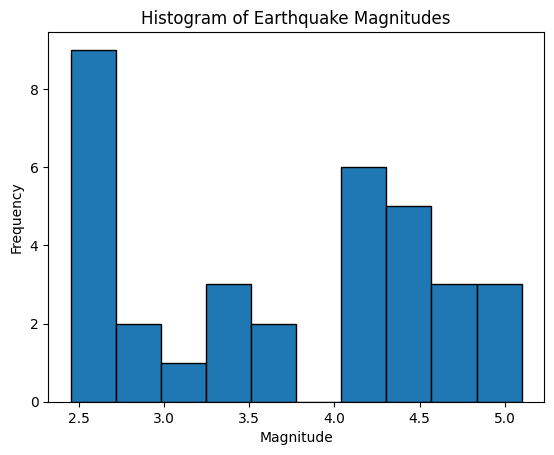

File saved successfully.


In [1]:
# 
# Example file for parsing and processing JSON
#

import urllib.request # instead of urllib2 like in Python 2.7
import json
import csv
import matplotlib.pyplot as plt

def printResults(data):
  # Usa la libreria importada para cargar los datos en una variable
  theJSON = json.loads(data)
  
  # revisamos lo que nos trajo del JSON e imprime el título que esta en metadata
  if "title" in theJSON["metadata"]:
    print (theJSON["metadata"]["title"])
  
  # Muestra cuantos eventos y su magnitud con un nombre de evento  
  count = theJSON["metadata"]["count"];
  print (str(count) + " events recorded")
  
  # De cada evento busca en la sección "features" del json dónde ocurrió
  for i in theJSON["features"]:
    print (i["properties"]["place"])
 # pone una linea de guiones al final
  print ("--------------\n")

  # Muestra los eventos con magnitud mayor a 4
  for i in theJSON["features"]:
    if i["properties"]["mag"] >= 4.0:
      print ("%2.1f" % i["properties"]["mag"], i["properties"]["place"])
# pone una linea de guiones al final
  print ("--------------\n")

  # imprime solo los eventos que han sido reportados por alguien
  print ("\n\nEventos reportados:")
  # el for es una repeticion de acciones, en este caso saca todas las lineas de texto leidas
  for i in theJSON["features"]:
    feltReports = i["properties"]["felt"]
    if (feltReports != None):
      if (feltReports > 0):
        print ("%2.1f" % i["properties"]["mag"]
               , i["properties"]["place"]
               , " reportado " + str(feltReports) + " veces")

def escribirArchivo(data):
  theJSON = json.loads(data)
  # se prepara para escribir en el archivo, linea por linea, usando su nombre para escribir
  with open('respuestaSismos.csv', 'w', encoding="utf-8") as csvfile:
    columnas = ['place','mag']
    writer = csv.DictWriter(csvfile, fieldnames=columnas)
    writer.writeheader()
    for i in theJSON["features"]:
      registro =({'place':i['properties']['place'],'mag':i['properties']['mag']})
 # si hubo filas leidas y puestas en registro... las graba en el archivo
 
      if (registro != None):
       writer.writerow(registro)

# nos da el mensaje que se grabó y terminamos... ahora a cargarlo a una tabla o a Excel
  print("Archivo Guardado")

 
  
def main():
  # define la variable que recibira lo que hay en la direccion o URL
  # Usarmos los feed de datos gratuitos del USGS
  # Este feed lista los terremotos del ultimo dia de Magnitud mayor a 2.5
  urlData = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson"
  # Abre la pagina y toma los datos
  webUrl = urllib.request.urlopen(urlData)
# muestra que mensaje nos da el servidor
  print ("Nos reponde el codigo: " + str(webUrl.getcode()))

# si es "200" esta ok y si da otros son errores#

  if (webUrl.getcode() == 200):
    data = webUrl.read()

# Imprime los resultados y los guarda en un archivo
    printResults(data) 
    escribirArchivo(data)
  else:
    print ("Received an error from server, cannot retrieve results " + str(webUrl.getcode()))

if __name__ == "__main__":
  main()


def generate_magnitude_histogram(features):
    magnitudes = [feature['properties']['mag'] for feature in features]
    plt.hist(magnitudes, bins=10, edgecolor='black')
    plt.title('Histogram of Earthquake Magnitudes')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.show()

def main():
  urlData = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson"
  webUrl = urllib.request.urlopen(urlData)
  print ("Nos reponde el codigo: " + str(webUrl.getcode()))
  if (webUrl.getcode() == 200):
    data = webUrl.read()
    json_data = json.loads(data)
    if json_data:
      printResults(json_data)
      write_to_csv(json_data["features"])
      generate_magnitude_histogram(json_data["features"])
      print("File saved successfully.")
  else:
    print ("Received an error from server, cannot retrieve results " + str(webUrl.getcode()))

def printResults(theJSON):
  if "title" in theJSON["metadata"]:
    print (theJSON["metadata"]["title"])
  count = theJSON["metadata"]["count"];
  print (str(count) + " events recorded")
  for i in theJSON["features"]:
    print (i["properties"]["place"])
  print ("--------------\n")
  for i in theJSON["features"]:
    if i["properties"]["mag"] >= 4.0:
      print ("%2.1f" % i["properties"]["mag"], i["properties"]["place"])
  print ("--------------\n")
  print ("\n\nEventos reportados:")
  for i in theJSON["features"]:
    feltReports = i["properties"]["felt"]
    if (feltReports != None):
      if (feltReports > 0):
        print ("%2.1f" % i["properties"]["mag"], i["properties"]["place"], " reportado " + str(feltReports) + " veces")

def write_to_csv(features):
  with open('respuestaSismos.csv', 'w', encoding="utf-8") as csvfile:
    columnas = ['place','mag']
    writer = csv.DictWriter(csvfile, fieldnames=columnas)
    writer.writeheader()
    for i in features:
      registro =({'place':i['properties']['place'],'mag':i['properties']['mag']})
      if (registro != None):
        writer.writerow(registro)
  print("Archivo Guardado")

def generate_magnitude_histogram(features):
  magnitudes = [feature['properties']['mag'] for feature in features]
  plt.hist(magnitudes, bins=10, edgecolor='black')
  plt.title('Histogram of Earthquake Magnitudes')
  plt.xlabel('Magnitude')
  plt.ylabel('Frequency')
  plt.show()

if __name__ == "__main__":  main()

